# **Heart Disease Analysis: Insights and Predictive Trends**

## **Overview**
This analysis examines the patterns and relationships within heart disease data, revealing key factors that contribute to its occurrence. By examining various variables, we aim to identify trends that could aid in predicting heart disease risks.

## **Key Focus Areas**
- **Demographic Distribution:** Assessing the prevalence of heart disease across different age groups and sexes to identify high-risk populations.
- **Correlation Analysis:** Investigating the relationships between various health indicators and heart disease occurrence.
- **Predictive Trends:** Detecting significant patterns that could contribute to early prediction and preventive healthcare strategies.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [4]:
df = pd.read_csv("/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv")
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Gender: Biological sex of the patient (The male is set to 1 and the female to 0)

## Get info. on data types, missing values and the features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## **Demographic Distribution Analysis**

## Distribution of the Features

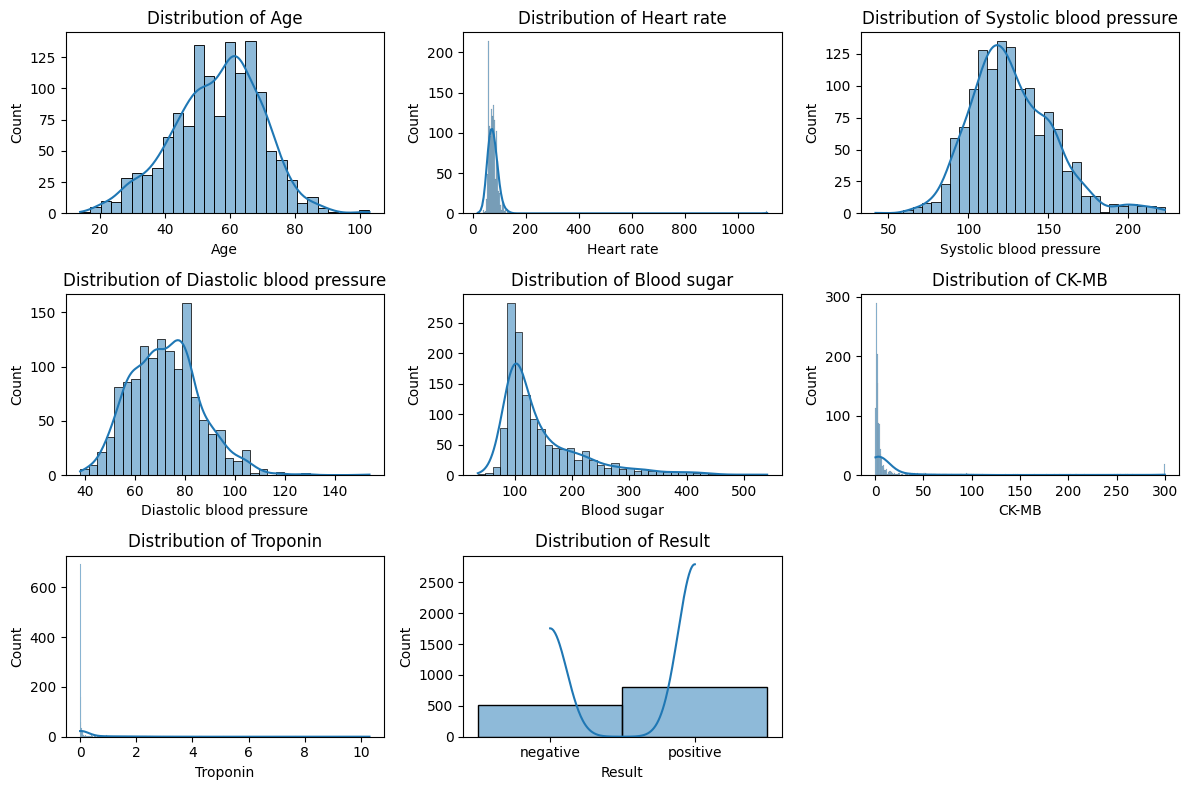

In [6]:
numeric_features = ["Age", "Heart rate", "Systolic blood pressure", "Diastolic blood pressure", 
                    "Blood sugar", "CK-MB", "Troponin", "Result"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


## Identify the impact of the Features

### Analyze how age, blood pressure, CK-MB and Troponin influence heart disease.

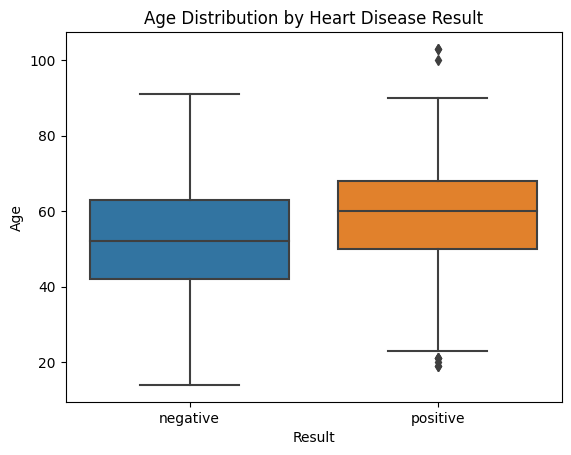

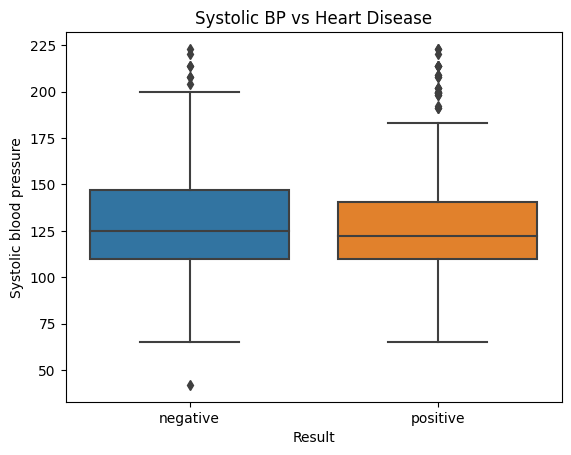

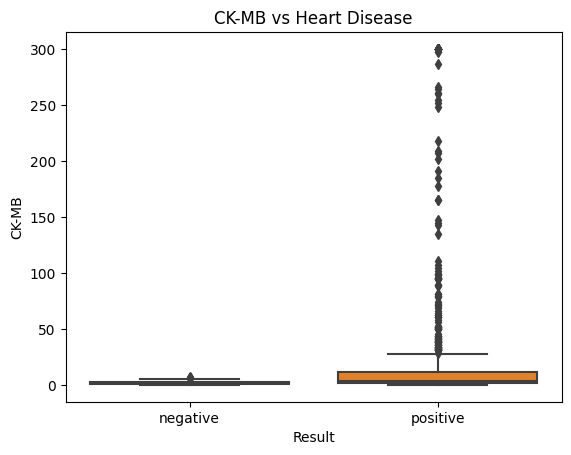

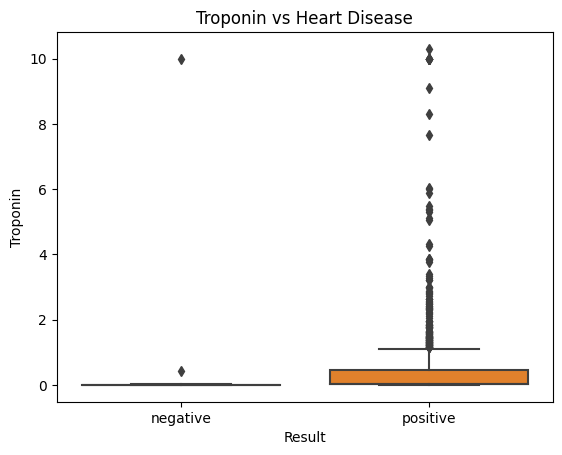

In [7]:
sns.boxplot(x="Result", y="Age", data=df)
plt.title("Age Distribution by Heart Disease Result")
plt.show()

sns.boxplot(x="Result", y="Systolic blood pressure", data=df)
plt.title("Systolic BP vs Heart Disease")
plt.show()

sns.boxplot(x="Result", y="CK-MB", data=df)
plt.title("CK-MB vs Heart Disease")
plt.show()

sns.boxplot(x="Result", y="Troponin", data=df)
plt.title("Troponin vs Heart Disease")
plt.show()

### Identify the Most Affected Groups by Heart Disease Based on Gender and Age

In [8]:
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ["0-20", "21-40", "41-60", "61-80", "81-100"]

df["Age_group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

dd = df.groupby(["Result", "Gender", "Age_group"], observed=True).size()

print(dd)

Result    Gender  Age_group
negative  0       0-20           1
                  21-40         34
                  41-60         81
                  61-80         82
                  81-100         4
          1       0-20           1
                  21-40         57
                  41-60        152
                  61-80         93
                  81-100         4
positive  0       0-20           2
                  21-40         12
                  41-60         85
                  61-80        133
                  81-100        13
          1       21-40         45
                  41-60        229
                  61-80        273
                  81-100        15
dtype: int64


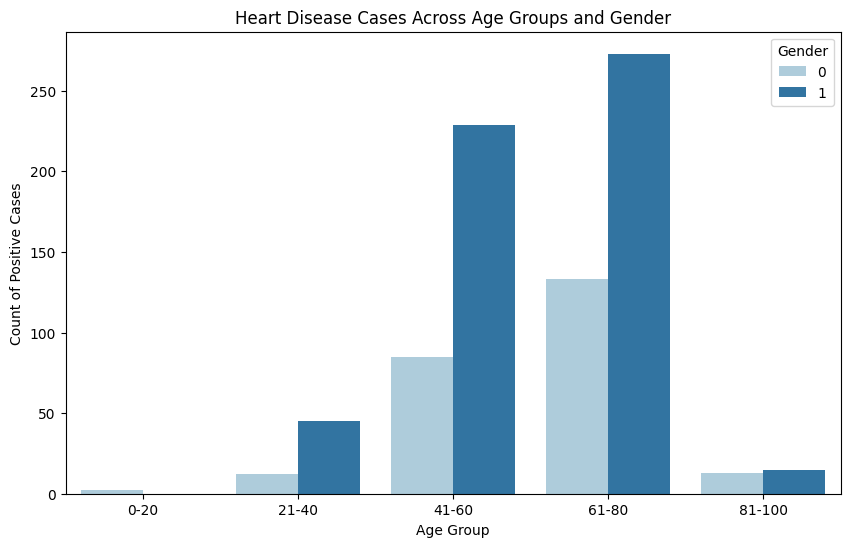

In [9]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

# Filter data for positive heart disease cases
df_filtered = df[df["Result"] == "positive"]

# Group by Age and Gender, counting occurrences
df_grouped = df_filtered.groupby(["Age_group", "Gender"], observed=True)["Result"].count().reset_index()

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x="Age_group", y="Result", hue="Gender", palette="Paired")


plt.title("Heart Disease Cases Across Age Groups and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count of Positive Cases")
plt.legend(title="Gender")
plt.show()


## Feature Interactions

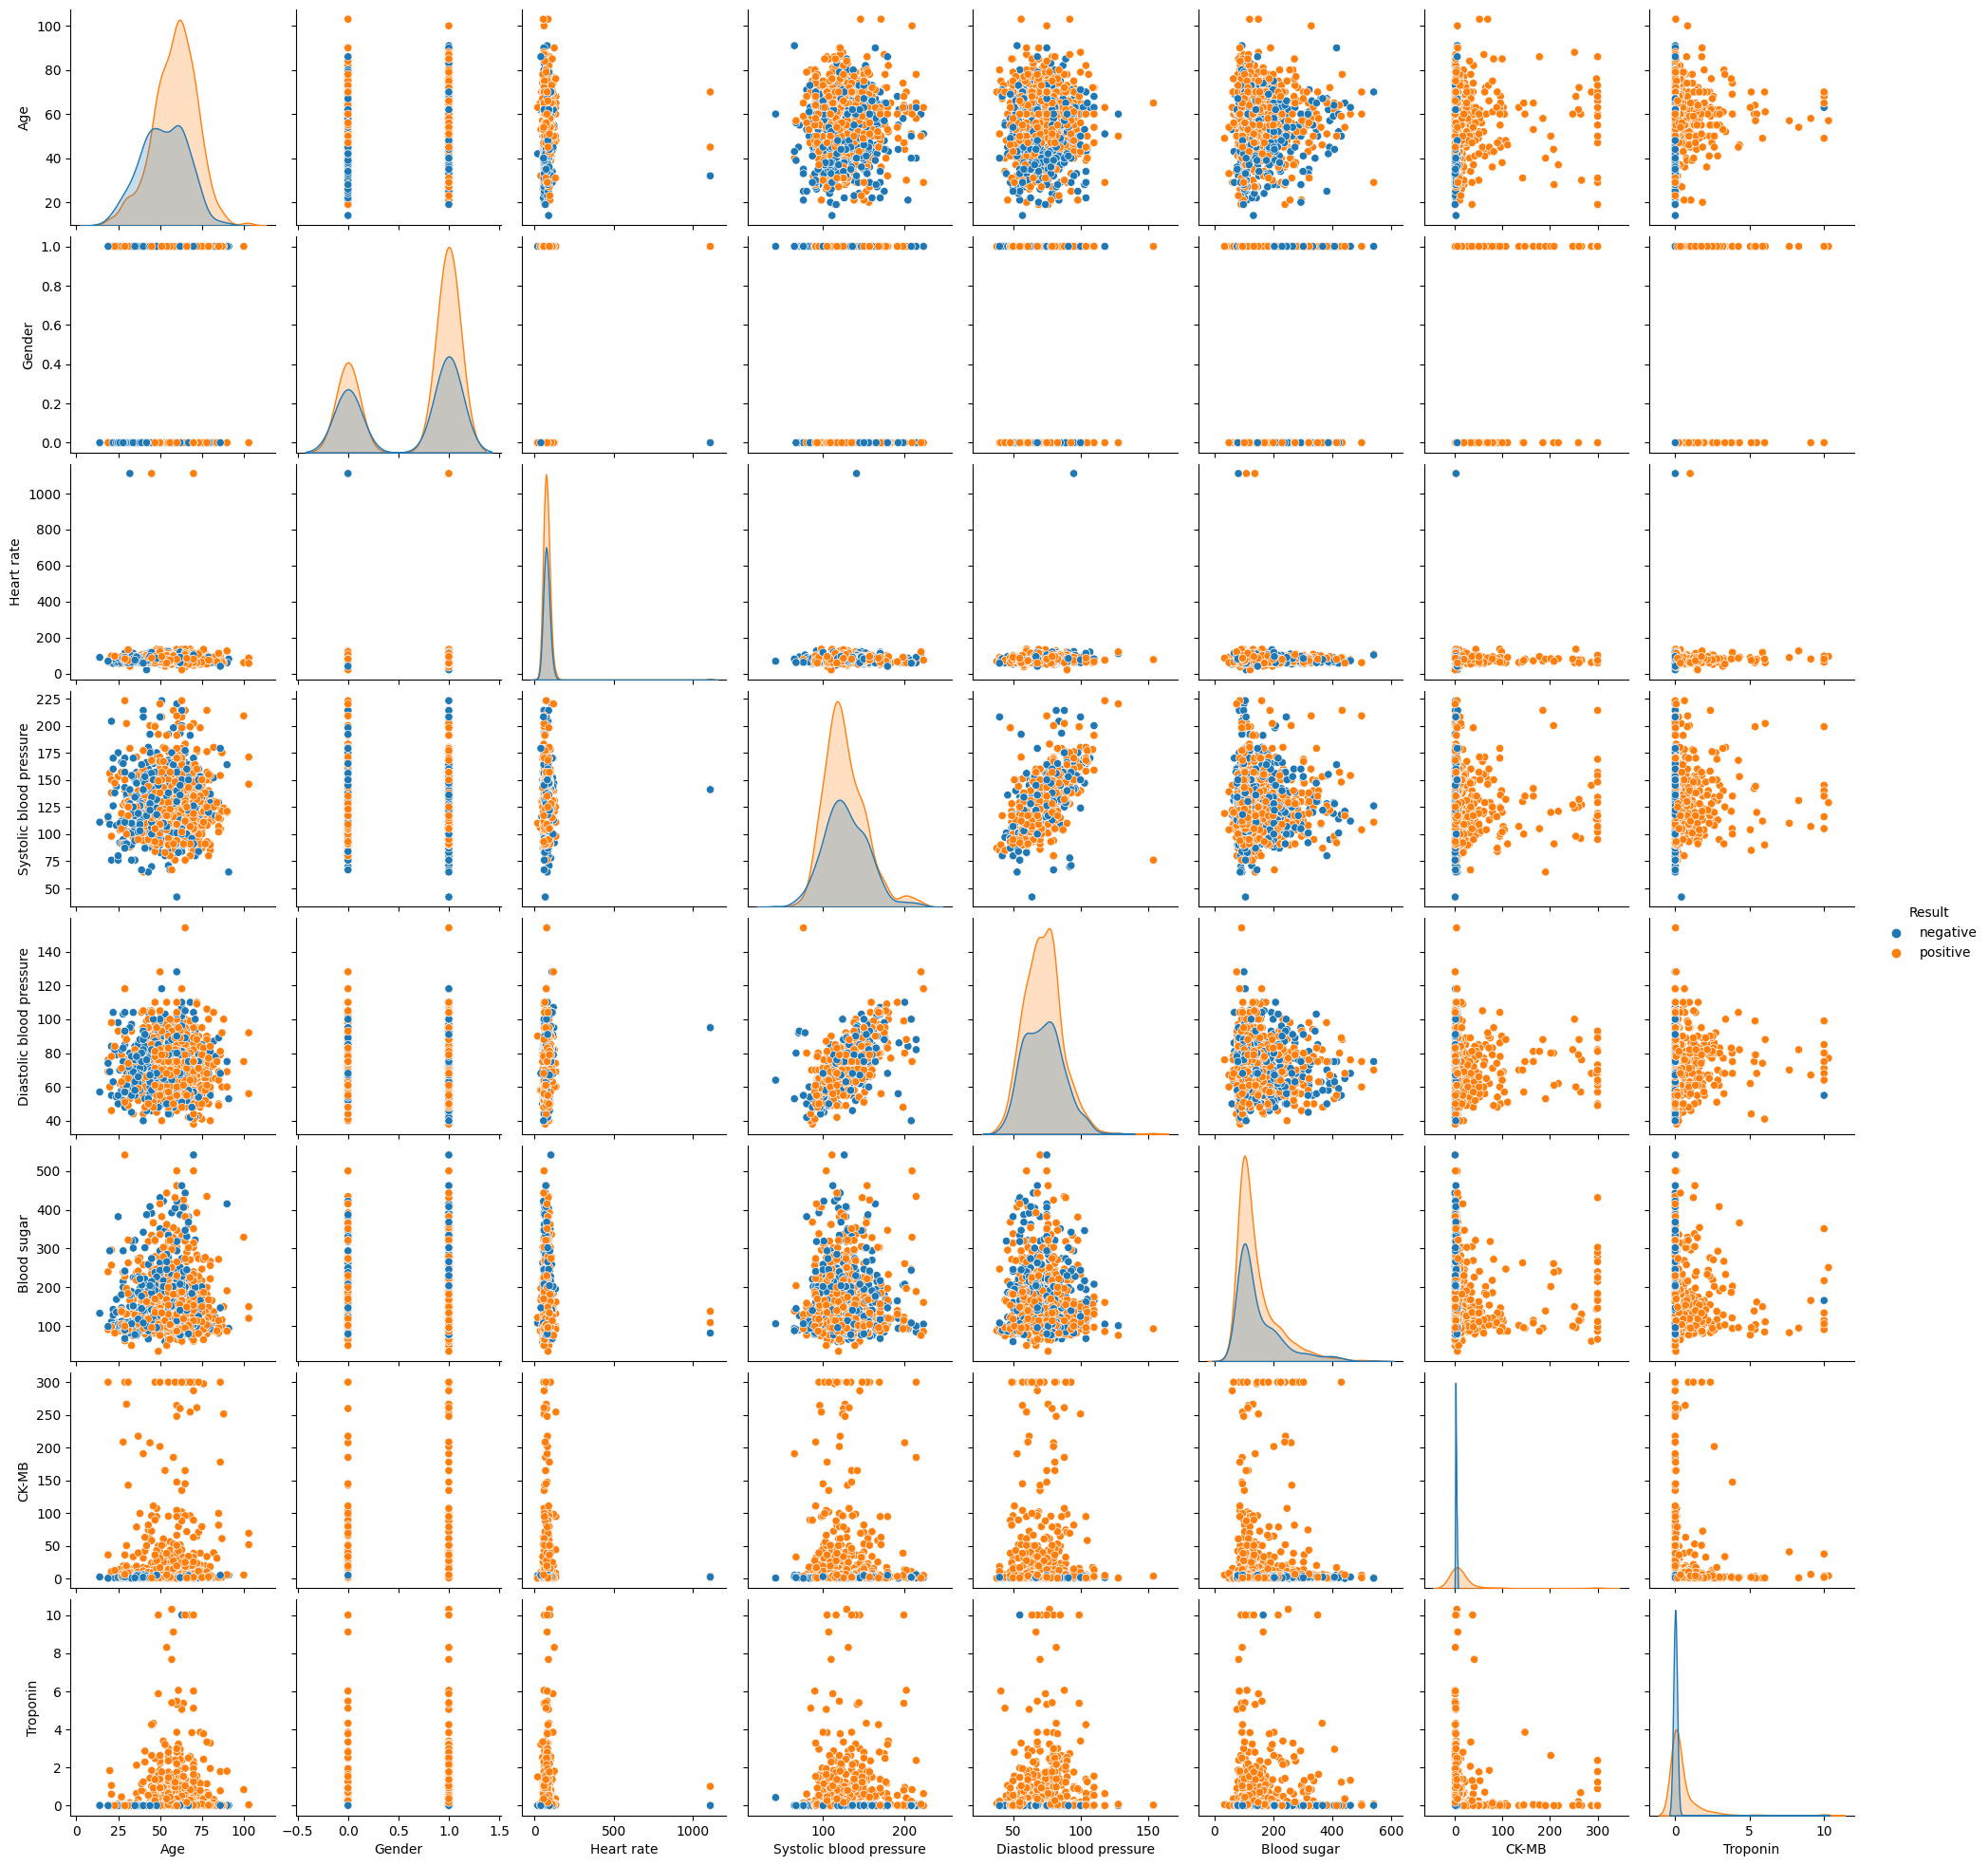

In [10]:
sns.pairplot(df, hue="Result", diag_kind="kde")
plt.show()

##  **Correlation Analysis**

### Determine the relationships between different features.

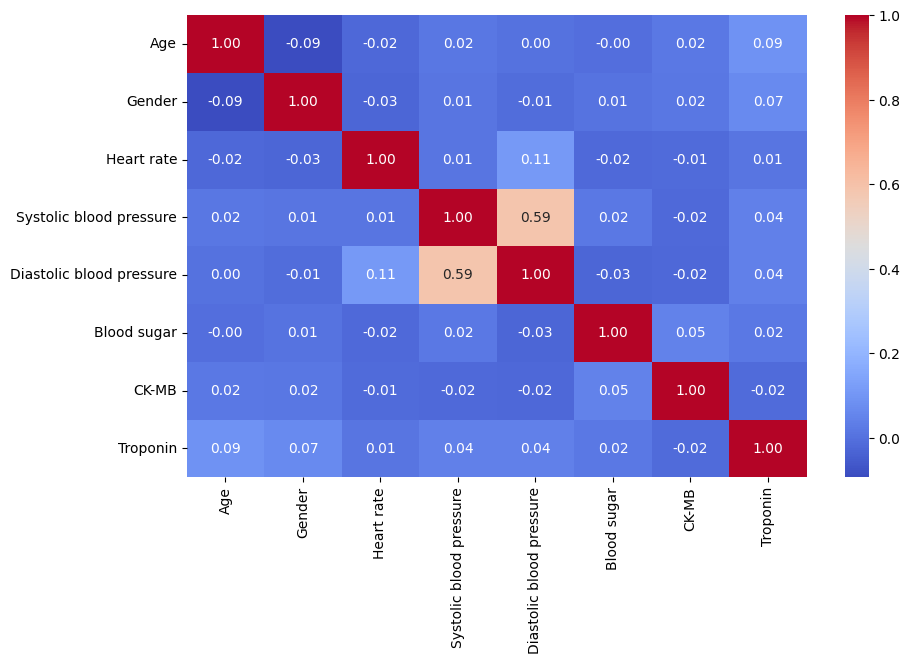

In [11]:
plt.figure(figsize=(10, 6))
ndf = df.select_dtypes(include=["number"])
corr=ndf.corr()
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()

## **Predictive Trend Analysis**

### Encode the catagorial columns with LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

### Train the model using a train-test split approach.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("Result", axis=1).drop("Age_group",axis=1)
y = df["Result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit the model with multiple models, ensuring robust performance and predictive accuracy.


 Training: Logistic Regression
 Accuracy: 0.7955


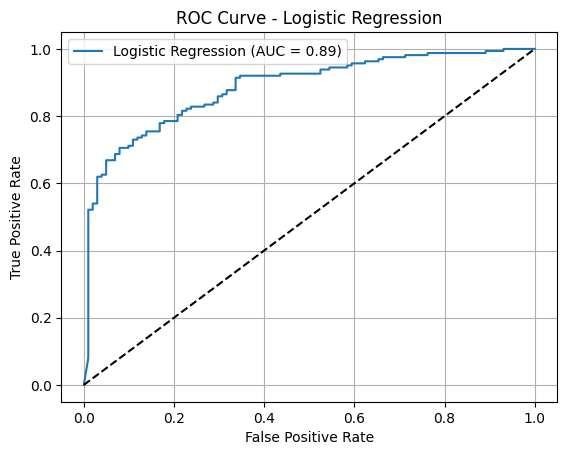


 Training: K-Nearest Neighbors
 Accuracy: 0.6439


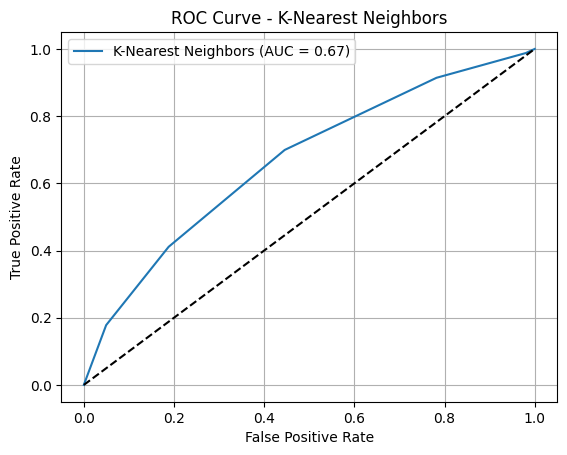


 Training: Decision Tree
 Accuracy: 0.9773


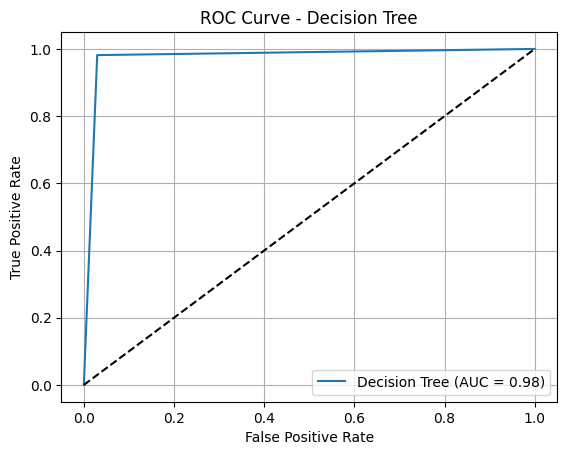


 Training: Random Forest
 Accuracy: 0.9811


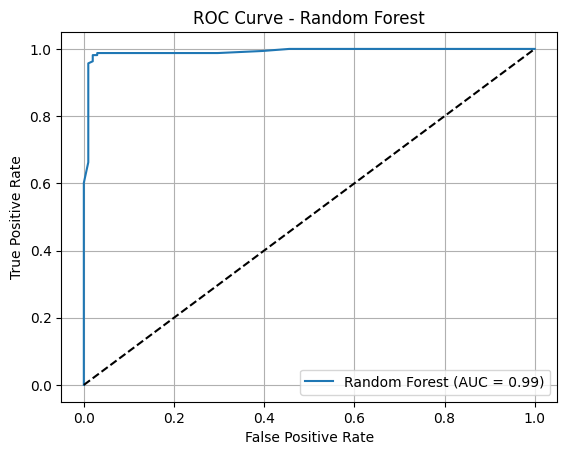


 Training: SVM
 Accuracy: 0.6932


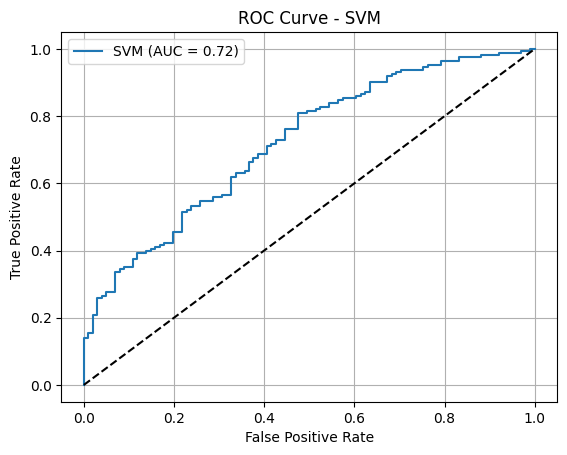


 Training: Naive Bayes
 Accuracy: 0.7879


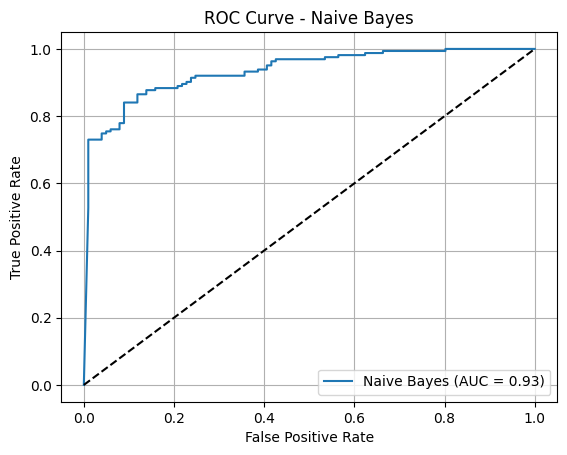


 Training: AdaBoost
 Accuracy: 0.9621


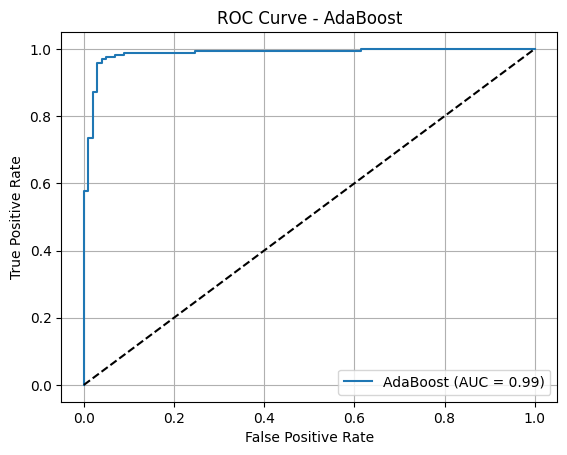


 Training: Gradient Boosting
 Accuracy: 0.9773


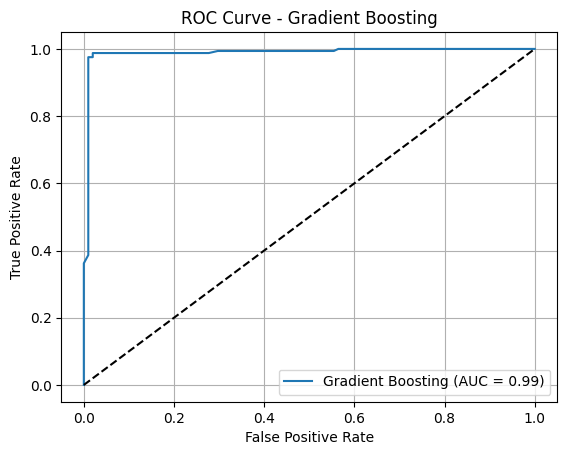


✅ Best Model: Random Forest with Accuracy: 0.9811


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import numpy as np

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Fit each model and evaluate
results = {}

for name, model in models.items():
    print(f"\n Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #  Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f" Accuracy: {acc:.4f}")

    #  ROC Curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

# Find the best model
best_model = max(results, key=results.get)
print(f"\n✅ Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")


### The model is now fully trained and ready to make predictions using the selected features!

In [15]:
new_patient = pd.DataFrame([{
    'Age': 55,
    'Gender': 1,
    'Heart rate': 66,
    'Systolic blood pressure': 160,
    'Diastolic blood pressure': 70,
    'Blood sugar': 150,
    'CK-MB': 1.80,
    'Troponin': 0.012,
}])

prediction = model.predict(new_patient)
decoded_prediction = label_encoders["Result"].inverse_transform([prediction[0]])

print("Predicted Heart Disease:", decoded_prediction[0])

Predicted Heart Disease: negative


## Conclusion

### The Random Forest model is now ready to predict heart disease based on key medical features! The results showcase its ability to aid in early diagnosis & decision-making. Fine-tuning & larger datasets can further improve accuracy.



### ***Thanks for your time! 😊 If you found this helpful, please consider upvoting!***

